<a href="https://colab.research.google.com/github/sunjinnn/Blockchain2025/blob/main/25_10_14_%EB%A6%BF%EC%A7%80%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9903815817570367
0.9827976465386928


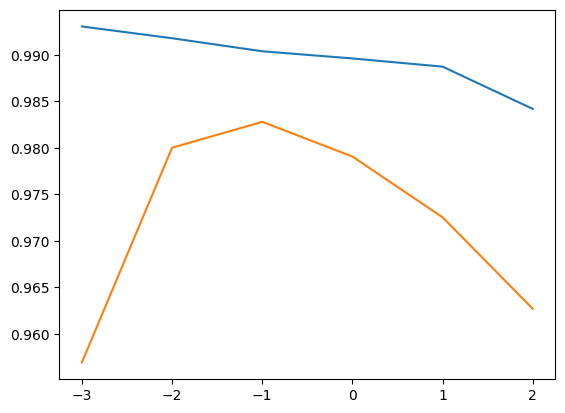

In [11]:
import numpy as np #강의록 65페이지까지 했어염mport numpy as np #강의록 65페이지까지 했어염 시험범위는 여기까지
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

poly=PolynomialFeatures(degree=5, include_bias=False) #학습할 때 데이터 (3가지)를 여러 가지로 만들 거임 그 때 곱셈이나 그런 연산자가 들어가는데 절편은 a가 영향을 많이 미치기 때문에 편향을 무시해라
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

ss=StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #이거를 규제라고 부르셨다
for a in alpha_list :
  ridge = Ridge(alpha=a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# print(train_score)
# print(test_score)

ridge = Ridge(alpha=0.1) #수업에서 이쪽 값을 만짐
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

#기존에는 degree값을 만졌는데 릿지 회귀에서는 alpha값을 만지는 중

import matplotlib.pyplot as plt
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()